In [384]:
import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline

In [385]:
data = pd.read_csv("../../data/processed/expensas_full.csv",
                  dtype = {
                                "expensa_id": "object",
                                "unidad_id": "object",
                                "propietario_id": "object",
                                "inquilino_id": "object",
                                "consorcio_id": "object",
                                "consorcio_usa_fondo": "bool",
                                "consorcio_solo_muestra_cat": "bool",
                                "unidad_tipo":"object",
                                "expensa_concepto": "object",
                                "expensa_mes":"object",
                                "expensa_anio":"object",
                                "unidad_propietario":"object",
                                "unidad_inquilino":"object",
                                "expensa_version":"object"
                            },
                  parse_dates = ["consorcio_fecha_creacion", "expensa_primer_vencimiento", "expensa_segundo_vencimiento"])

In [386]:
data.pago_fecha = pd.to_datetime(data.pago_fecha, errors="coerce")

In [387]:
data.expensa_mes = data.expensa_mes.str.pad(width=2, side = "left", fillchar= "0")

In [388]:
data["expensa_fecha"] = pd.to_datetime(data.expensa_anio + "-" + data.expensa_mes + "-01")

## Variable Objetivo : Paga dentro del mes que corresponde?

In [389]:
data["expensa_mes_pago"] = pd.to_datetime(data.expensa_primer_vencimiento.dt.year.map(str) + '-'+ data.expensa_primer_vencimiento.dt.month.map(str) + '-01')

In [390]:
data.loc[data.pago_fecha.isna(), "target"] = 1

In [391]:
data.loc[(~data.pago_fecha.isna()) & (data.pago_fecha >= (data.expensa_mes_pago + pd.DateOffset(months=1))), "target"] = 1

In [392]:
data.loc[data.target.isna(), "target"] = 0

In [393]:
data[["expensa_mes","expensa_anio", "expensa_mes_pago", "expensa_primer_vencimiento", "expensa_segundo_vencimiento", "pago_fecha", "pago_monto", "target"]]

,expensa_mes,expensa_anio,expensa_mes_pago,expensa_primer_vencimiento,expensa_segundo_vencimiento,pago_fecha,pago_monto,target
0,01,2014,2014-02-01,2014-02-10,2014-02-20,NaT,NaN,1.0
1,02,2014,2014-03-01,2014-03-10,2014-03-20,NaT,NaN,1.0
2,03,2014,2014-04-01,2014-04-10,2014-04-20,2014-04-08,624.45,0.0
3,04,2014,2014-05-01,2014-05-10,2014-05-20,2014-05-05,857.58,0.0
4,05,2014,2014-06-01,2014-06-10,2014-06-20,2014-06-04,710.80,0.0
5,06,2014,2014-07-01,2014-07-10,2014-07-20,2014-07-07,1109.25,0.0
6,07,2014,2014-08-01,2014-08-10,2014-08-20,2014-10-01,931.22,1.0
7,08,2014,2014-09-01,2014-09-10,2014-09-20,2014-09-09,879.12,0.0
8,09,2014,2014-10-01,2014-10-10,2014-10-20,2014-10-07,1538.82,0.0
9,10,2014,2014-11-01,2014-11-10,2014-11-20,2014-11-04,72.26,0.0


In [394]:
target_prop = data.target.sum() / data.target.count()
target_prop

0.27241026978847366

In [395]:
data.dtypes

consorcio_id                                    object
consorcio_fecha_creacion                datetime64[ns]
consorcio_nombre                                object
consorcio_modo_pago                             object
consorcio_visibilidad_gasto                     object
consorcio_tipo                                  object
consorcio_usa_fondo                               bool
consorcio_solo_muestra_cat                        bool
unidad_id                                       object
unidad_denominacion                             object
unidad_metros                                  float64
unidad_tipo                                     object
unidad_propietario                              object
expensa_id                                      object
unidad_inquilino                                object
expensa_primer_vencimiento              datetime64[ns]
expensa_segundo_vencimiento             datetime64[ns]
expensa_monto                                  float64
expensa_mo

## Analisis Exploratorio de Variables vs Variable Objetivo

In [396]:
base_plot = (ggplot(data, aes(fill='factor(target)'))
 + geom_hline(yintercept=target_prop) 
 + ylab("Proporcion de Pagos Tardios")
 + scale_fill_manual(["#5DADE2", "#EC7063"], name="Paga Tarde") 
 + theme(
     panel_background = element_rect(fill = "white"),
     panel_grid = element_line(color="grey", linetype="dashed", size=0.5)
 )
)

def get_xlab(varname):
    varname = varname.split("_")
    varname = varname[1:]
    varname = " ".join(varname)
    return varname.capitalize()

def get_title(varname):
    varname = varname.replace("_", " ")
    varname = varname.capitalize()
    varname += " vs Target"
    return varname

def plot_target_vs_var(varname, xlab_rot = 0):
    return (base_plot 
            + geom_bar(aes(x=varname),position = "fill")
            + geom_hline(yintercept=target_prop, linetype="dashed")
            + xlab(get_xlab(varname))
            + ggtitle(get_title(varname))
            + theme(axis_text_x = element_text(angle = xlab_rot, hjust = 1)))

def plot_cat_var(varname, xlab_rot = 0):
    return (base_plot 
            + geom_bar(aes(x=varname))
            + xlab(get_xlab(varname))
            + ggtitle(get_xlab(varname))
            + theme(axis_text_x = element_text(angle = xlab_rot, hjust = 1)))

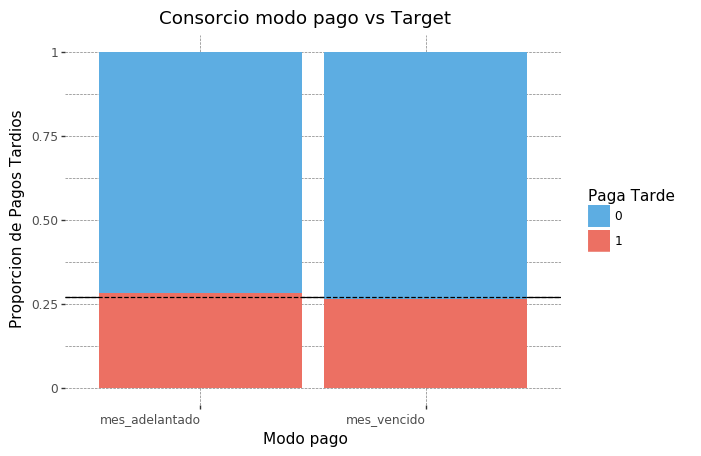

<ggplot: (-9223371897122737369)>

In [397]:
plot_target_vs_var("consorcio_modo_pago")

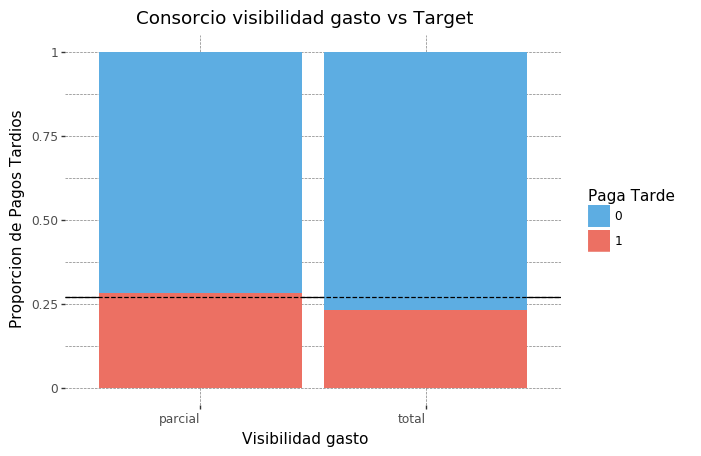

<ggplot: (-9223371897108143314)>

In [398]:
plot_target_vs_var("consorcio_visibilidad_gasto")

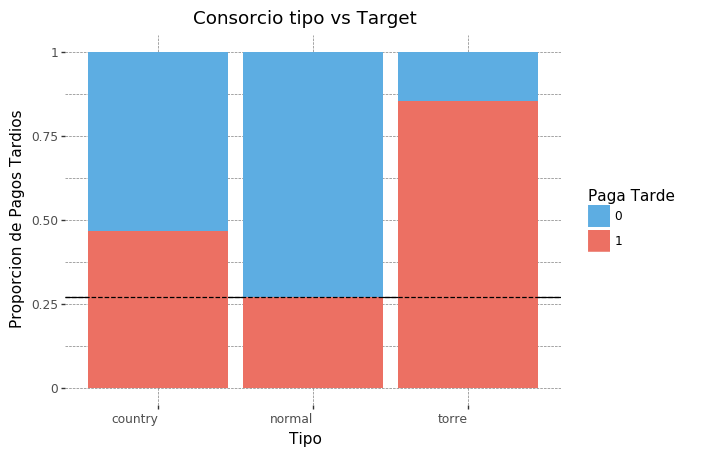

<ggplot: (139723276215)>

In [399]:
plot_target_vs_var("consorcio_tipo")

In [400]:
data[["consorcio_id","consorcio_tipo"]].groupby("consorcio_tipo").count()

,consorcio_id
consorcio_tipo,
country,111
normal,229752
torre,132


In [401]:
data.loc[data.consorcio_tipo == "torre",:]

,consorcio_id,consorcio_fecha_creacion,consorcio_nombre,consorcio_modo_pago,consorcio_visibilidad_gasto,consorcio_tipo,consorcio_usa_fondo,consorcio_solo_muestra_cat,unidad_id,unidad_denominacion,...,expensa_mes,expensa_anio,expensa_version,expensa_concepto,pago_fecha,pago_monto,pago_metodo,expensa_fecha,expensa_mes_pago,target
228562,1995,2017-12-22 09:02:10,EDIFICIO III - TORRE 2 PRO.CRE.AR,mes_adelantado,parcial,torre,False,False,45639,P. 1 Dto. A - UFP 116,...,11,2018,2,1,2019-02-05,534.0,Nota de crédito,2018-11-01,2018-12-01,1.0
228563,1995,2017-12-22 09:02:10,EDIFICIO III - TORRE 2 PRO.CRE.AR,mes_adelantado,parcial,torre,False,False,45639,P. 1 Dto. A - UFP 116,...,12,2018,1,1,2019-01-14,1031.0,Pago Facil,2018-12-01,2019-01-01,0.0
228564,1995,2017-12-22 09:02:10,EDIFICIO III - TORRE 2 PRO.CRE.AR,mes_adelantado,parcial,torre,False,False,45640,P. 1 Dto. B - UFP 117,...,11,2018,2,1,2019-03-07,544.0,Nota de crédito,2018-11-01,2018-12-01,1.0
228565,1995,2017-12-22 09:02:10,EDIFICIO III - TORRE 2 PRO.CRE.AR,mes_adelantado,parcial,torre,False,False,45640,P. 1 Dto. B - UFP 117,...,12,2018,1,1,2019-03-07,1072.0,Nota de crédito,2018-12-01,2019-01-01,1.0
228566,1995,2017-12-22 09:02:10,EDIFICIO III - TORRE 2 PRO.CRE.AR,mes_adelantado,parcial,torre,False,False,45641,P. 2 Dto. A - UFP 118,...,11,2018,2,1,NaT,NaN,NaN,2018-11-01,2018-12-01,1.0
228567,1995,2017-12-22 09:02:10,EDIFICIO III - TORRE 2 PRO.CRE.AR,mes_adelantado,parcial,torre,False,False,45641,P. 2 Dto. A - UFP 118,...,12,2018,1,1,NaT,NaN,NaN,2018-12-01,2019-01-01,1.0
228568,1995,2017-12-22 09:02:10,EDIFICIO III - TORRE 2 PRO.CRE.AR,mes_adelantado,parcial,torre,False,False,45642,P. 2 Dto. B - UFP 119,...,11,2018,2,1,NaT,NaN,NaN,2018-11-01,2018-12-01,1.0
228569,1995,2017-12-22 09:02:10,EDIFICIO III - TORRE 2 PRO.CRE.AR,mes_adelantado,parcial,torre,False,False,45642,P. 2 Dto. B - UFP 119,...,12,2018,1,1,NaT,NaN,NaN,2018-12-01,2019-01-01,1.0
228570,1995,2017-12-22 09:02:10,EDIFICIO III - TORRE 2 PRO.CRE.AR,mes_adelantado,parcial,torre,False,False,45643,P. 3 Dto. A - UFP 120,...,11,2018,2,1,NaT,NaN,NaN,2018-11-01,2018-12-01,1.0
228571,1995,2017-12-22 09:02:10,EDIFICIO III - TORRE 2 PRO.CRE.AR,mes_adelantado,parcial,torre,False,False,45643,P. 3 Dto. A - UFP 120,...,12,2018,1,1,NaT,NaN,NaN,2018-12-01,2019-01-01,1.0


No sirve mucho esta variable, porque solo hay una torre y un country. Lo que si da para pensar es que hay consorcios mas propensos a pagar tarde. Podria incluirse una variable que mapee esta información

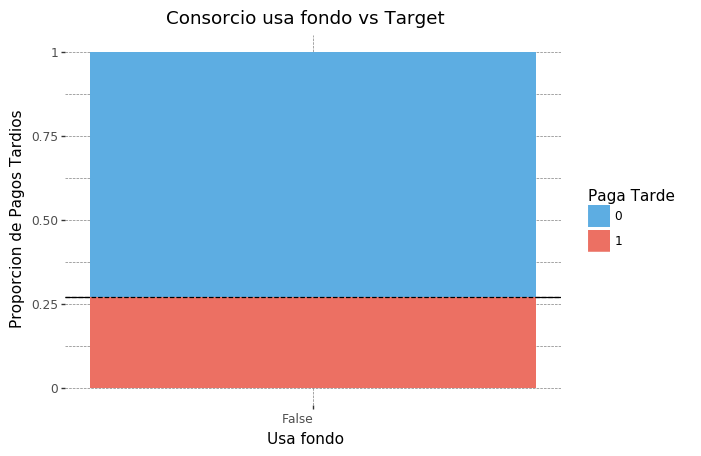

<ggplot: (139723276110)>

In [402]:
plot_target_vs_var("consorcio_usa_fondo")

Esta variable no sirve porque son todos False

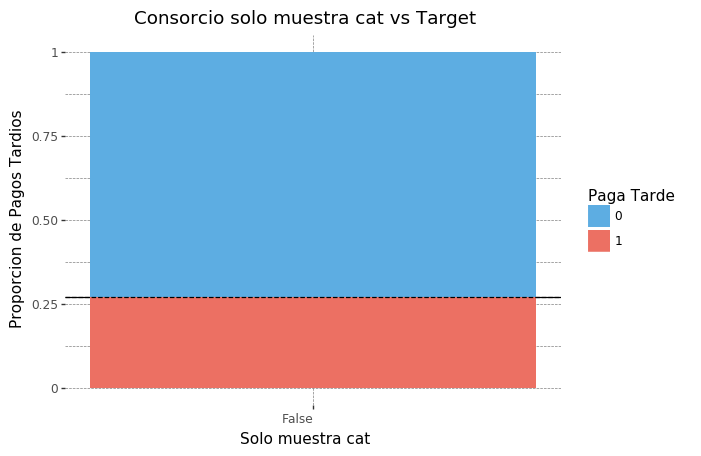

<ggplot: (139723303274)>

In [403]:
plot_target_vs_var("consorcio_solo_muestra_cat")

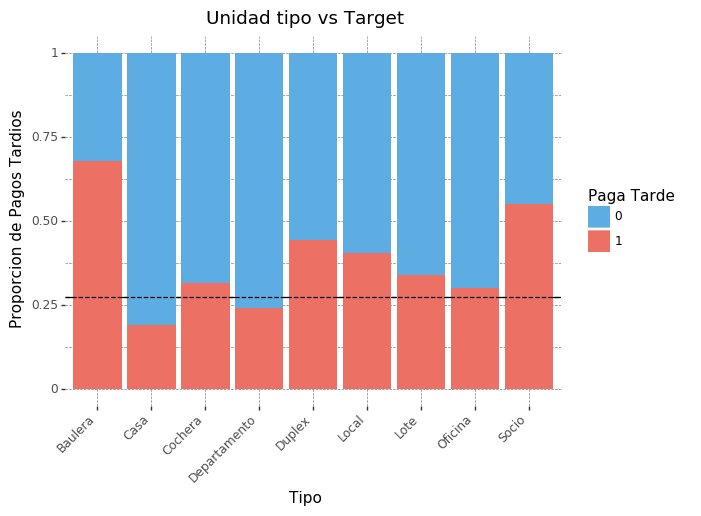

<ggplot: (-9223371897132360423)>

In [404]:
plot_target_vs_var("unidad_tipo", 45)

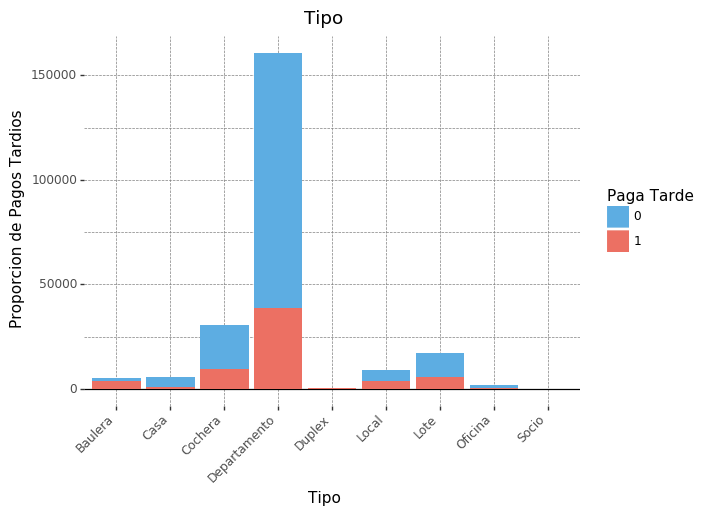

<ggplot: (139721103855)>

In [405]:
plot_cat_var("unidad_tipo", 45)

In [406]:
unidades_por_tipo = data.loc[:, ["unidad_id", "unidad_tipo"]].groupby(["unidad_id", "unidad_tipo"]).count().reset_index().groupby("unidad_tipo").count().reset_index()
unidades_por_tipo.columns = ["unidad_tipo", "cantidad"]
unidades_por_tipo

,unidad_tipo,cantidad
0,Baulera,119
1,Casa,621
2,Cochera,1896
3,Departamento,9853
4,Duplex,25
5,Local,520
6,Lote,1578
7,Oficina,141
8,Socio,19


In [407]:
total_consorcios =  len(data.loc[:, "consorcio_id"].unique())
for tipo in unidades_por_tipo.unidad_tipo:
    cantidad_de_consorcios = len(data.loc[data.unidad_tipo == tipo, "consorcio_id"].unique())
    print(tipo, "cantidad de consorcios:", cantidad_de_consorcios, ", porcentaje de consorcios", cantidad_de_consorcios/total_consorcios)

Baulera cantidad de consorcios: 8 , porcentaje de consorcios 0.022727272727272728
Casa cantidad de consorcios: 6 , porcentaje de consorcios 0.017045454545454544
Cochera cantidad de consorcios: 97 , porcentaje de consorcios 0.2755681818181818
Departamento cantidad de consorcios: 336 , porcentaje de consorcios 0.9545454545454546
Duplex cantidad de consorcios: 3 , porcentaje de consorcios 0.008522727272727272
Local cantidad de consorcios: 181 , porcentaje de consorcios 0.5142045454545454
Lote cantidad de consorcios: 9 , porcentaje de consorcios 0.02556818181818182
Oficina cantidad de consorcios: 13 , porcentaje de consorcios 0.036931818181818184
Socio cantidad de consorcios: 1 , porcentaje de consorcios 0.002840909090909091


In [408]:
data.unidad_propietario.describe()

count     229649
unique     10748
top          0.0
freq        6494
Name: unidad_propietario, dtype: object

In [409]:
data.loc[:,"unidad_propietario_b"] = ~((data.unidad_propietario == "0.0") | data.unidad_propietario.isna())

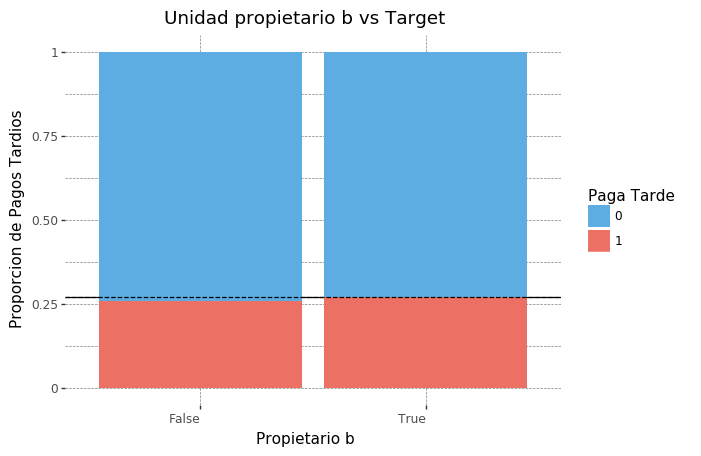

<ggplot: (-9223371897130391222)>

In [410]:
plot_target_vs_var("unidad_propietario_b")

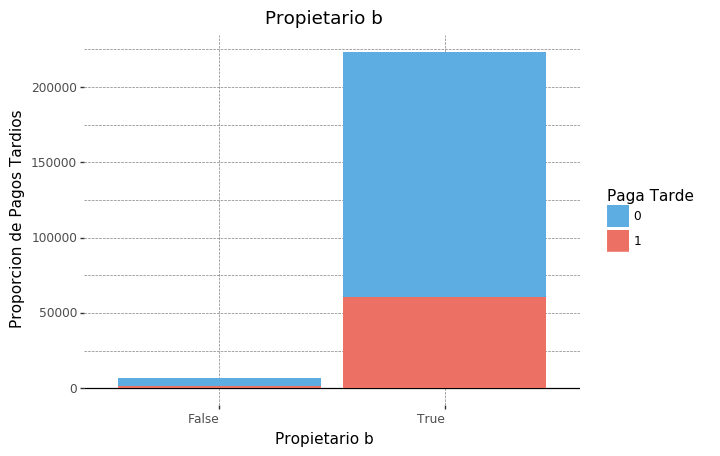

<ggplot: (-9223371897132097620)>

In [411]:
plot_cat_var("unidad_propietario_b")

In [412]:
data.unidad_inquilino.describe()

count     11747
unique      980
top       101.0
freq        140
Name: unidad_inquilino, dtype: object

In [413]:
data.loc[:,"unidad_inquilino_b"] = ~data.unidad_inquilino.isna()

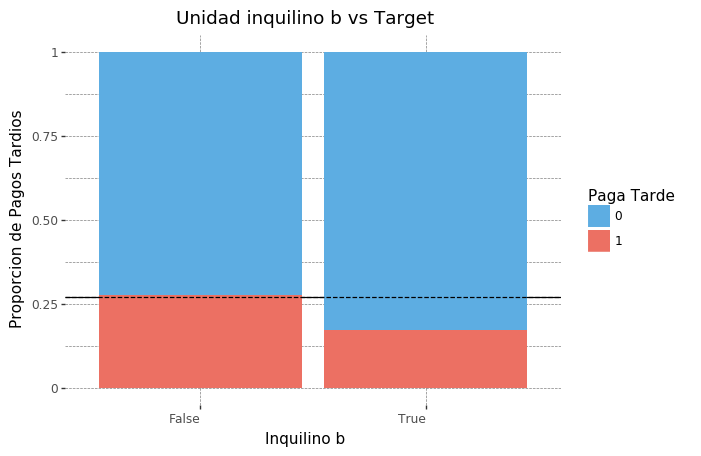

<ggplot: (-9223371897132135578)>

In [414]:
plot_target_vs_var("unidad_inquilino_b")

In [415]:
data.unidad_inquilino_b.describe()

count     229995
unique         2
top        False
freq      218248
Name: unidad_inquilino_b, dtype: object

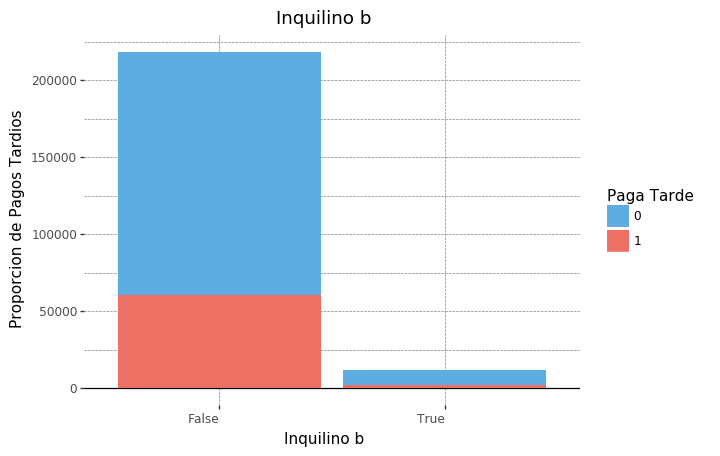

<ggplot: (-9223371897132147540)>

In [416]:
plot_cat_var("unidad_inquilino_b")

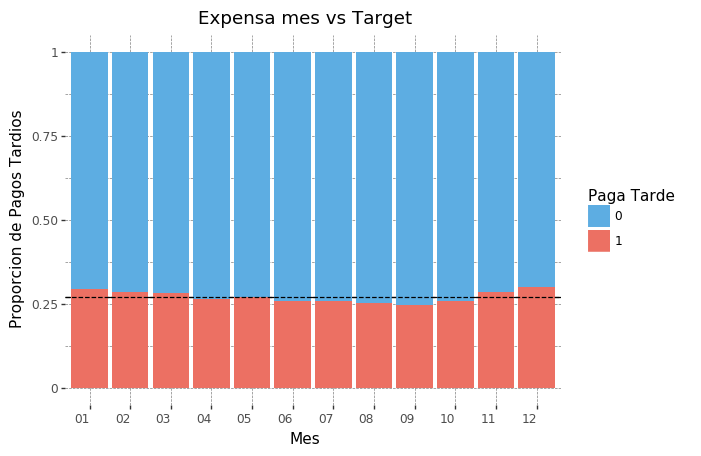

<ggplot: (139722834331)>

In [417]:
plot_target_vs_var("expensa_mes")

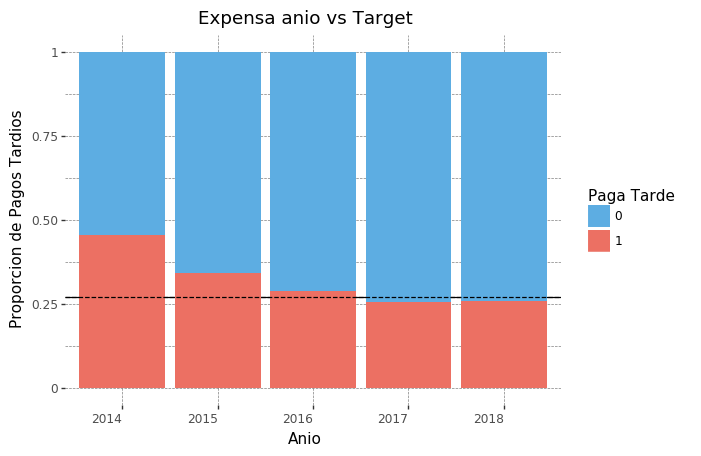

<ggplot: (139723268935)>

In [418]:
plot_target_vs_var("expensa_anio")

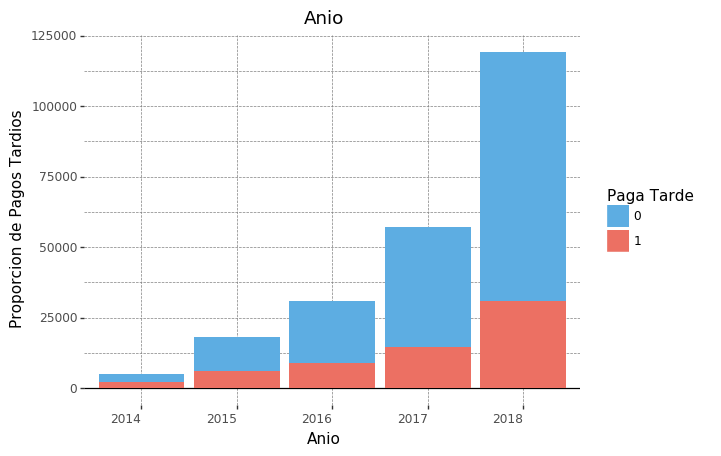

<ggplot: (139724295586)>

In [419]:
plot_cat_var("expensa_anio")

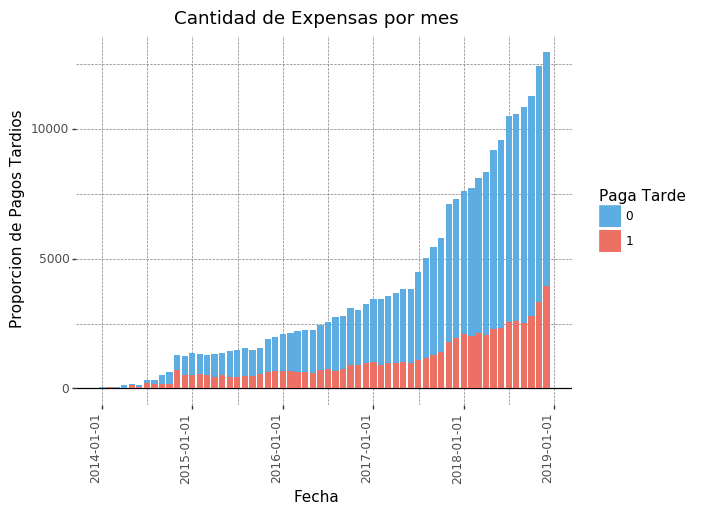

<ggplot: (-9223371897004810408)>

In [420]:
(plot_cat_var("expensa_fecha", 90) +
 ggtitle("Cantidad de Expensas por mes"))

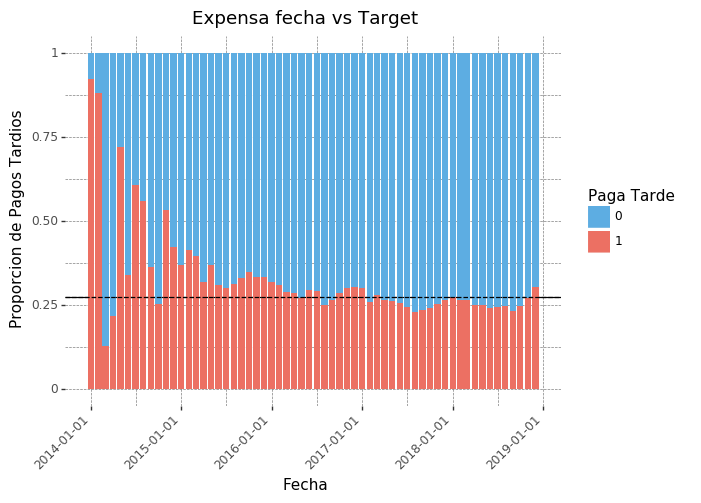

<ggplot: (-9223371897132118328)>

In [421]:
plot_target_vs_var("expensa_fecha", 45)

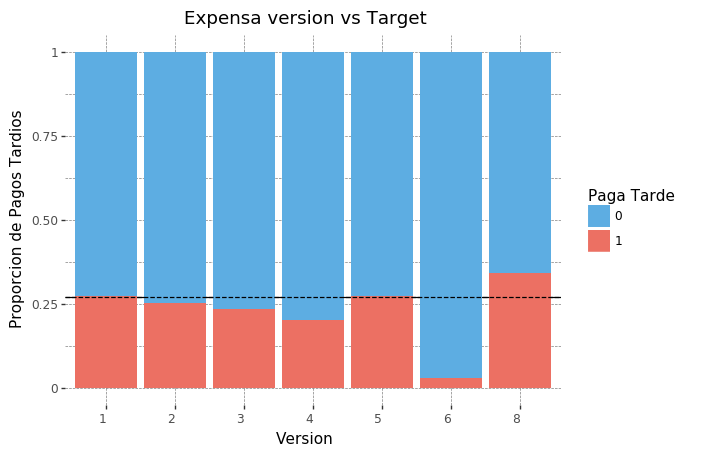

<ggplot: (-9223371897131872789)>

In [423]:
plot_target_vs_var("expensa_version")

In [424]:
data[["expensa_id","expensa_version"]].groupby("expensa_version").count()

,expensa_id
expensa_version,
1,201781
2,21181
3,4927
4,1500
5,391
6,32
8,183


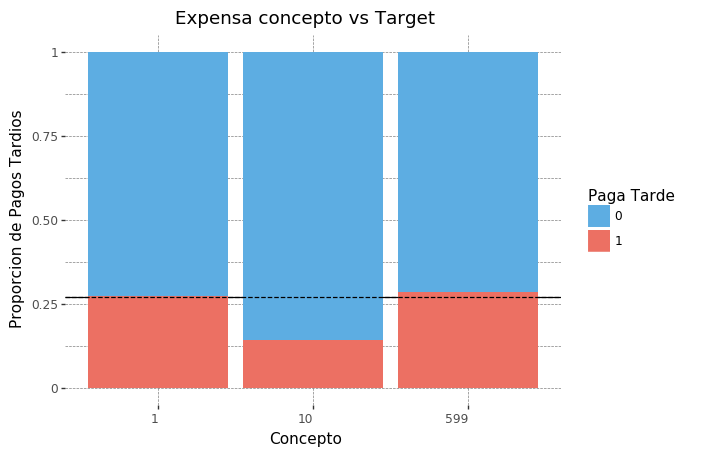

<ggplot: (-9223371897130726947)>

In [425]:
plot_target_vs_var("expensa_concepto")

In [426]:
data[["expensa_id","expensa_concepto"]].groupby("expensa_concepto").count()

,expensa_id
expensa_concepto,
1,222183
10,4547
599,3265


In [427]:
consorcios_por_tipo = data.loc[:, ["consorcio_id", "expensa_concepto"]].groupby(["consorcio_id", "expensa_concepto"]).count().reset_index().groupby("expensa_concepto").count().reset_index()
consorcios_por_tipo.columns = ["expensa_concepto", "cantidad"]
consorcios_por_tipo

,expensa_concepto,cantidad
0,1,350
1,10,3
2,599,1


## PROPENSION POR CONSORCIO

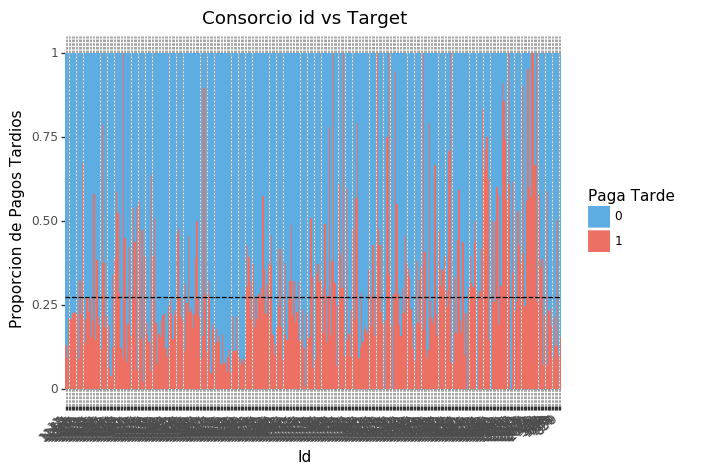

<ggplot: (139836331791)>

In [428]:
plot_target_vs_var("consorcio_id", 45)

In [512]:
expensas_por_consorcio = data[["target","consorcio_id", "consorcio_nombre"]].groupby(["consorcio_id", "consorcio_nombre"]).count()
expensas_por_consorcio.columns = ["cantidad"]
pagos_tardios_por_consorcio = data[["target","consorcio_id", "consorcio_nombre"]].groupby(["consorcio_id", "consorcio_nombre"]).sum()
pagos_tardios_por_consorcio.columns = ["pagos_tardios"]

In [505]:
cantidad_meses_consorcio = data[["consorcio_id", "consorcio_nombre", "expensa_fecha","expensa_id"]].groupby(["consorcio_id", "consorcio_nombre", "expensa_fecha"]).count()
cantidad_meses_consorcio = cantidad_meses_consorcio.reset_index()
cantidad_meses_consorcio = cantidad_meses_consorcio.drop(columns="expensa_id")
cantidad_meses_consorcio = cantidad_meses_consorcio.groupby(["consorcio_id", "consorcio_nombre"]).count()
cantidad_meses_consorcio.columns = ["cantidad_meses"]

In [518]:
data["pago_metodo_efectivo"] = data.pago_metodo == "Efectivo"
data["no_pago"] = data.pago_metodo.isna()
metodo_por_consorcio = data[["consorcio_id", "consorcio_nombre", "pago_metodo_efectivo","no_pago"]].groupby(["consorcio_id", "consorcio_nombre"]).sum()
metodo_por_consorcio.columns = ["efectivo", "no_pago"]

In [519]:
resumen_por_consorcio = pd.merge(expensas_por_consorcio, pagos_tardios_por_consorcio, left_index=True, right_index=True)
resumen_por_consorcio = pd.merge(resumen_por_consorcio, cantidad_meses_consorcio, left_index=True, right_index=True)
resumen_por_consorcio = pd.merge(resumen_por_consorcio, metodo_por_consorcio, left_index=True, right_index=True)
resumen_por_consorcio

,,cantidad,pagos_tardios,cantidad_meses,efectivo,no_pago
consorcio_id,consorcio_nombre,,,,,
11,Metropolis,2593,340.0,34,210.0,56.0
1147,Uarte de la Mancha I,495,45.0,45,221.0,0.0
1175,Consorcio Sucre 310,675,143.0,45,0.0,143.0
1253,Consorcio Fiumiccino IV,880,179.0,44,17.0,3.0
1257,Consorcio Fiumiccino III,880,186.0,44,32.0,0.0
1294,Julcar,2494,562.0,43,0.0,515.0
1340,Esquiú,672,154.0,42,0.0,137.0
1386,Complejo Magdalena Extraordinarias,164,37.0,7,9.0,6.0
1392,Círculo de Bioquímicos Extraordinarias,244,54.0,6,15.0,3.0


In [520]:
resumen_por_consorcio["prop_pagos_tardios"] = resumen_por_consorcio.pagos_tardios / resumen_por_consorcio.cantidad
resumen_por_consorcio["tamano_promedio"] = resumen_por_consorcio.cantidad / resumen_por_consorcio.cantidad_meses
resumen_por_consorcio["porc_pagos_efectivo"] = resumen_por_consorcio.efectivo / resumen_por_consorcio.cantidad
resumen_por_consorcio["porc_pagos_tardios_no_pagos"] = resumen_por_consorcio.no_pago / resumen_por_consorcio.pagos_tardios

In [521]:
resumen_por_consorcio = resumen_por_consorcio.reset_index()

In [522]:
resumen_por_consorcio = resumen_por_consorcio.sort_values("cantidad", ascending=False)
resumen_por_consorcio

,consorcio_id,consorcio_nombre,cantidad,pagos_tardios,cantidad_meses,efectivo,no_pago,prop_pagos_tardios,tamano_promedio,porc_pagos_efectivo,porc_pagos_tardios_no_pagos
349,827,Coppar,25900,13030.0,50,18180.0,5107.0,0.503089,518.000000,0.701931,0.391942
338,518,ACONCAGUA,7488,2887.0,52,4.0,2738.0,0.385550,144.000000,0.000534,0.948389
128,1648,Altos Y Bosques de Catalina,5904,2526.0,16,69.0,857.0,0.427846,369.000000,0.011687,0.339272
347,742,EDIFICIO SUSSEX I,5750,1222.0,50,4567.0,110.0,0.212522,115.000000,0.794261,0.090016
9,1407,Balcones de cofico III,4865,433.0,38,1697.0,37.0,0.089003,128.026316,0.348818,0.085450
106,1618,Jardin Claret,4313,590.0,19,51.0,96.0,0.136796,227.000000,0.011825,0.162712
335,355,Villa Toscana - Altos del Río,3548,922.0,54,1348.0,6.0,0.259865,65.703704,0.379932,0.006508
97,1598,Tejas Dos,3472,545.0,8,6.0,74.0,0.156970,434.000000,0.001728,0.135780
135,1672,Tejas del Sur Cuatro SA,3464,943.0,15,154.0,336.0,0.272229,230.933333,0.044457,0.356310
210,1796,El Sol S.A.I.C. y .F.,3265,934.0,6,1766.0,534.0,0.286064,544.166667,0.540888,0.571734


In [523]:
resumen_por_consorcio.loc[resumen_por_consorcio.cantidad_meses>= 6].sort_values("prop_pagos_tardios", ascending= False)

,consorcio_id,consorcio_nombre,cantidad,pagos_tardios,cantidad_meses,efectivo,no_pago,prop_pagos_tardios,tamano_promedio,porc_pagos_efectivo,porc_pagos_tardios_no_pagos
190,1756,Jeronimo Cortes,64,64.0,8,8.0,56.0,1.000000,8.000000,0.125000,0.875000
98,1600,SAN MARTIN FSM,720,645.0,20,0.0,626.0,0.895833,36.000000,0.000000,0.970543
187,1750,Sierra Nueva,2084,1623.0,10,7.0,1530.0,0.778791,208.400000,0.003359,0.942699
12,1410,EDIFICIO CALICANTO,1577,1059.0,27,225.0,952.0,0.671528,58.407407,0.142676,0.898961
61,1530,EDIFICIO SAFIRA III,392,250.0,28,282.0,7.0,0.637755,14.000000,0.719388,0.028000
199,1779,CORRIENTES 2875,154,92.0,7,84.0,26.0,0.597403,22.000000,0.545455,0.282609
342,568,LA ESQUINA,1768,1043.0,52,125.0,972.0,0.589932,34.000000,0.070701,0.931927
36,1473,EDIFICIO MARTIN,310,182.0,31,177.0,19.0,0.587097,10.000000,0.570968,0.104396
20,1431,EDIFICIO ARVIAL,216,125.0,12,78.0,69.0,0.578704,18.000000,0.361111,0.552000
140,1679,Callao 1659,252,145.0,14,91.0,15.0,0.575397,18.000000,0.361111,0.103448


In [486]:
resumen_por_consorcio.loc[resumen_por_consorcio.cantidad_meses>= 6].sort_values("prop_pagos_tardios", ascending= True)

,consorcio_id,consorcio_nombre,cantidad,pagos_tardios,cantidad_meses,porcentaje_efectivo,porcentaje_otros,prop_pagos_tardios,tamano_promedio
227,1819,CONSORCIO PROPIETARIOS AV. MITRE 857 859,30,0.0,6,1.000000,0.000000,0.000000,5.000000
170,1718,DOMINGO FUNES 586,132,1.0,12,0.818182,0.181818,0.007576,11.000000
55,1524,UARTE de la Mancha II,348,7.0,29,0.387931,0.612069,0.020115,12.000000
32,1464,Mural I,792,30.0,33,0.520202,0.479798,0.037879,24.000000
117,1631,CONSORCIO INARCO 29,1567,73.0,18,0.082961,0.917039,0.046586,87.055556
103,1612,Consorcio Edificio Consular X,576,28.0,18,0.036458,0.963542,0.048611,32.000000
114,1628,CONSORCIO INARCO 26,360,18.0,18,0.005556,0.994444,0.050000,20.000000
60,1529,Sucre Nº 2325,168,9.0,28,0.023810,0.976190,0.053571,6.000000
51,1515,Salvador V,1045,58.0,29,0.155981,0.844019,0.055502,36.034483
176,1726,Villa Veneto - Altos del Río,544,33.0,8,0.586397,0.413603,0.060662,68.000000


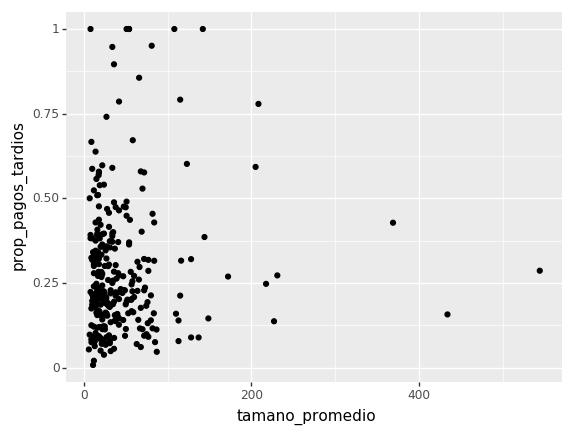

<ggplot: (139821518642)>

In [319]:
(ggplot(data=resumen_por_consorcio.loc[(resumen_por_consorcio.consorcio_id != "827") & (resumen_por_consorcio.cantidad >=36)],)
+ geom_point(aes(x="tamano_promedio", y="prop_pagos_tardios"))
)

In [524]:
data.loc[data.consorcio_id == "1530", ["unidad_denominacion", "expensa_fecha", "expensa_primer_vencimiento", "expensa_mes_pago", "expensa_monto", "expensa_monto_total", "pago_monto", "pago_metodo", "pago_fecha", "target"]].sort_values(["expensa_fecha", "unidad_denominacion"])[-950:]

,unidad_denominacion,expensa_fecha,expensa_primer_vencimiento,expensa_mes_pago,expensa_monto,expensa_monto_total,pago_monto,pago_metodo,pago_fecha,target
116236,1º A,2016-09-01,2016-09-15,2016-09-01,478.63,6875.00,708.37,Efectivo,2017-12-29,1.0
116264,1º B,2016-09-01,2016-09-15,2016-09-01,542.74,6875.00,575.79,Rapipago,2016-10-19,1.0
116292,1º C,2016-09-01,2016-09-15,2016-09-01,487.89,6875.00,487.89,Efectivo,2016-09-06,0.0
116320,1º D,2016-09-01,2016-09-15,2016-09-01,497.16,6875.00,497.16,Pago Facil,2016-09-12,0.0
116348,2º A,2016-09-01,2016-09-15,2016-09-01,478.63,6875.00,492.99,Rapipago,2016-09-19,0.0
116376,2º B,2016-09-01,2016-09-15,2016-09-01,542.74,6875.00,542.74,Efectivo,2016-09-09,0.0
116404,2º C,2016-09-01,2016-09-15,2016-09-01,487.89,6875.00,722.08,Efectivo,2017-12-29,1.0
116432,2º D,2016-09-01,2016-09-15,2016-09-01,497.16,6875.00,735.80,Efectivo,2017-12-29,1.0
116460,3º A,2016-09-01,2016-09-15,2016-09-01,478.63,6875.00,478.63,Rapipago,2016-09-14,0.0
116488,3º B,2016-09-01,2016-09-15,2016-09-01,542.74,6875.00,949.80,Efectivo,2018-09-20,1.0


In [531]:
cantidad_meses_consorcio2 = data.loc[data.consorcio_id == "1431", ["consorcio_id", "consorcio_nombre", "expensa_fecha","expensa_id"]].groupby(["consorcio_id", "consorcio_nombre", "expensa_fecha"]).count()


In [532]:
cantidad_meses_consorcio2

expensa_id
consorcio_id consorcio_nombre expensa_fecha            
1431         EDIFICIO ARVIAL  2015-12-01             18
                              2016-01-01             18
                              2016-02-01             18
                              2016-03-01             18
                              2016-04-01             18
                              2016-05-01             18
                              2016-06-01             18
                              2016-07-01             18
                              2016-08-01             18
                              2017-11-01             18
                              2017-12-01             18
                              2018-08-01             18

## Cosas a tener en cuenta despues de esto

    1.Porcentaje de pagos en efectivo como medida de uso como cuponera
    2.Chequear si la cantidad de meses que tienen se condice con la diferencia entre el ultimo mes y el primero para ver si tienen meses que no cargaron expensas.
    3.Utilizar tasa de pagos tardios

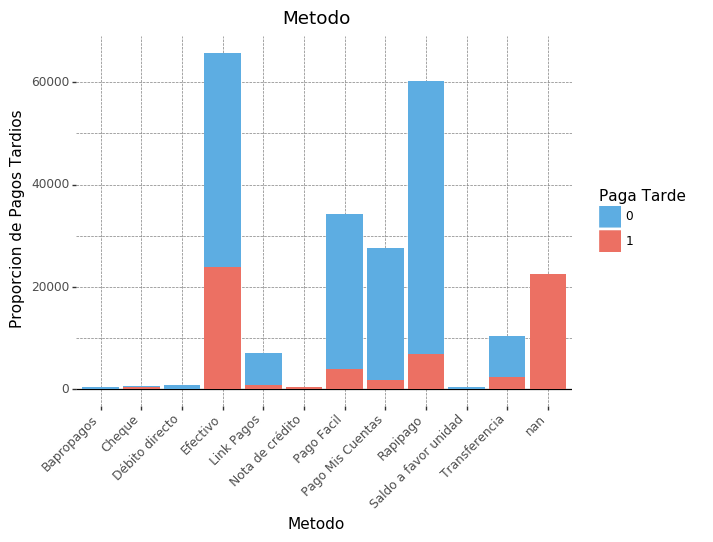

<ggplot: (-9223371897133859496)>

In [534]:
plot_cat_var("pago_metodo", 45)

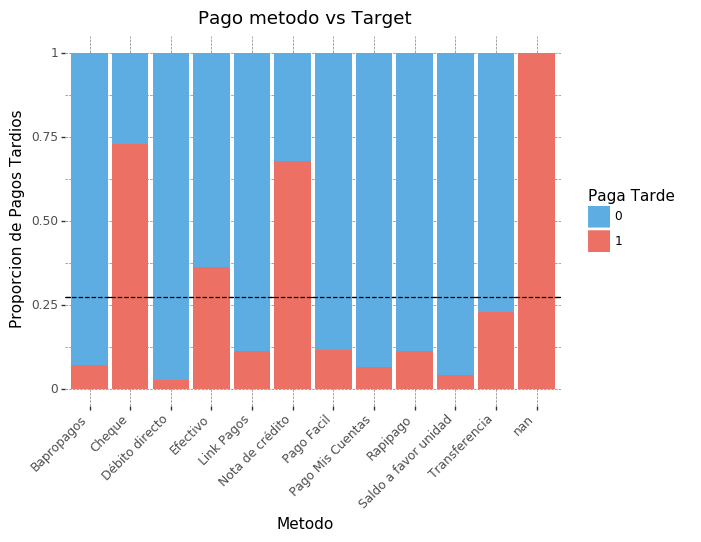

<ggplot: (-9223371897132391224)>

In [535]:
plot_target_vs_var("pago_metodo", 45)

In [536]:
data.loc[data.pago_metodo.isin(["Efectivo","Cheque"]),"pago_metodo_2"] = "Efec-Cheque"
data.loc[data.pago_metodo.isin(["Rapipago", "Pago Facil"]),"pago_metodo_2"] = "EntePago"
data.loc[data.pago_metodo.isin(["Transferencia", "Pago Mis Cuentas","Link Pagos","Bapropagos","Débito directo", "Débito Santander"]),"pago_metodo_2"] = "Internet"
data.loc[data.pago_metodo.isin(["Nota de crédito", "Saldo a favor unidad"]),"pago_metodo_2"] = "Otro"

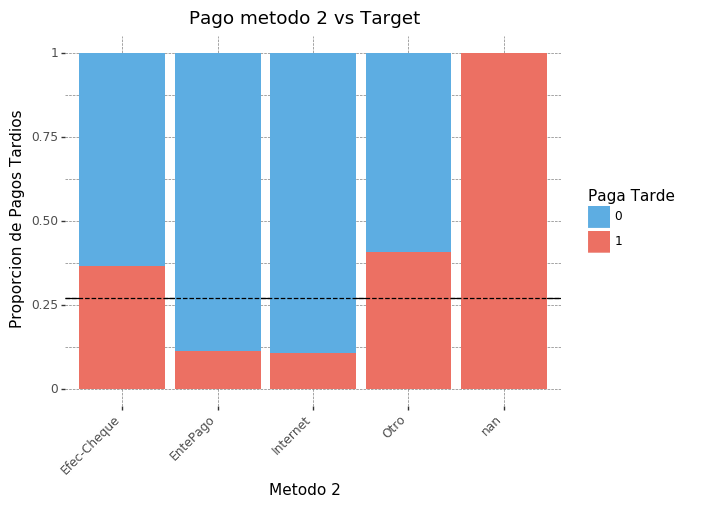

<ggplot: (-9223371897133831585)>

In [537]:
plot_target_vs_var("pago_metodo_2", 45)

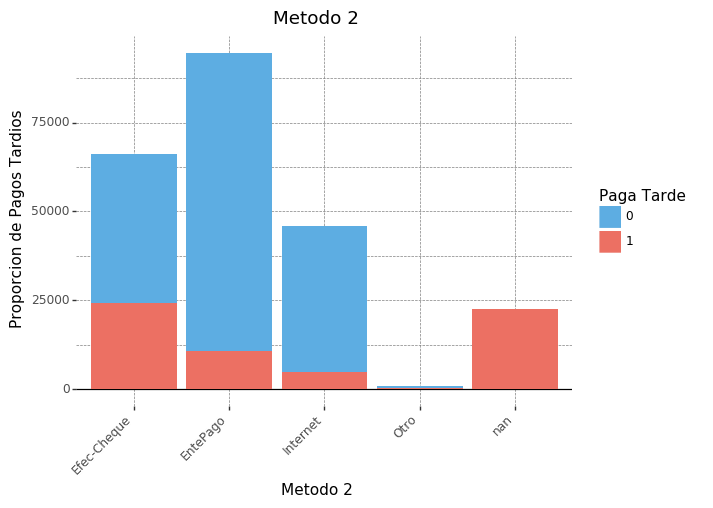

<ggplot: (-9223371897131911729)>

In [538]:
plot_cat_var("pago_metodo_2", 45)